##### Определение
Квантиль уровня $\alpha$ - такое число $z_{\alpha}$, что $F(z_{\alpha}) = \alpha$ или $\mathbb P(\xi \leq z_{\alpha}) = \alpha$.

Пример. Для симметричного распределения $z_{0.5} = 0$.

Квантиль уровня 0.5 называется медианой.

In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Проверяем что квантиль выборочный стремиться к квантилю по вероятности

Выборочный квантиль это порядковая статистика  альфа умножинь на эн. Так мы можем оценить квантиль

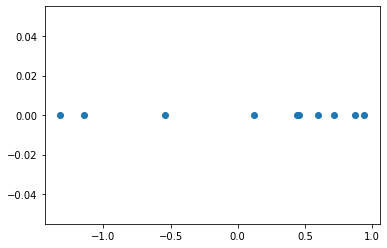

In [ ]:
N = 10
sample = sts.norm(0, 1).rvs(N)
sample
plt.scatter(sample, [0] * len(sample))

In [ ]:
p = 0.4 # уровень квантиял
z_p = sts.norm(0, 1).ppf(p) #квантиль
z_p

-0.2533471031357997

In [ ]:
np.sort(sample)

array([-1.32364391, -1.14604575, -0.53784608,  0.11962873,  0.44072129,
        0.45665634,  0.60082236,  0.72005375,  0.86963684,  0.94216994])

In [ ]:
np.quantile(sample, p)

0.31228426268130083

In [ ]:
N = 1000
sample = sts.norm(0, 1).rvs(N)

sample_quantiles = []
for n in range(1, N):
    sample_quantiles.append(np.quantile(sample[:n], p))

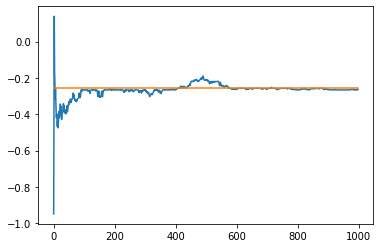

In [ ]:
plt.plot(sample_quantiles, label='sample quantile')
plt.plot([z_p] * len(sample_quantiles), label = 'true_quantile')

## Доверительные интервалы

Как это относится к задаче математической статистики и развивает понятие оценки

Пусть задана статистическая модель $(X, \mathcal B_X, \mathbb P_{\theta})$ с параметрическим семейством распределений $\mathbb P_{\theta}, \theta \in \Theta$. Также дана выборка $\mathbf X^n$.

##### Определение
Пара оценок $(S_1(\mathbf X^n), S_2(\mathbf X^n))$ называется доверительным интервалом параметра $\theta$ уровня доверия $\alpha$, если для любого $\theta \in \Theta$

$\mathbb P_{\theta}\left(S_1(\mathbf X^n) \leq \theta \leq S_2(\mathbf X^n)\right) \geq \alpha$.

Замечание про вычисление $\mathbb P_{\theta}$

Глупый пример. Пусть $\mathbf X^n$ - выборка из распределения Бернулли с параметром $p$. Тогда $(0, 1)$ - доверительный интервал уровня доверия $1$.

Упражнение. Подумать почему в определении доверительного интервала стоит знак $\geq$.

##### Определение
Доверительный интервал называется точным, если в определении выше стоит знак равенства для значения вероятности:

$\mathbb P_{\theta}\left(S_1(\mathbf X^n) \leq \theta \leq S_2(\mathbf X^n)\right) = \alpha$.

##### Определение
Пусть задана выборка $\mathbf X^n$ неограниченного размера $n$.

Последовательность пар оценок $(V_n(\mathbf X^n), U_n(\mathbf X^n))$ называется асимптотическим доверительным интервалом параметра $\theta$ уровня доверия $\alpha$, если для любого $\theta \in \Theta$

$\mathbb P_{\theta}\left(V_n(\mathbf X^n) \leq \theta \leq U_n(\mathbf X^n)\right) \to \alpha, n \to \infty$.

### Метод центральной статистики

Пусть существует некоторая функция $G(\mathbf X^n, \theta)$ такая, что её распределение $F_G$ не зависит от параметра $\theta$. Выберем квантили функции распределения $F_G$ $z_{\alpha_1}$ и $z_{\alpha_2}$. Тогда для любого $\theta$ выполнено

$\mathbb P\left(z_{\alpha_1} < G(\mathbf X^n, \theta) \leq z_{\alpha_2}\right) = F_G(z_{\alpha_2}) - F_G(z_{\alpha_1}) \geq \alpha_2 - \alpha_1$.

Тогда в случае, если $\theta$ выразима из $G(\mathbf X^n, \theta)$ можно получить интервал доверия уровня $1 - \alpha$ взяв $\alpha_2 - \alpha_1 = 1 - \alpha$.

Снова глупый пример. 

Пусть $\mathbf X^n \sim \mathcal N(\theta, 1)$.

$G(\mathbf X^n, \theta) = X_1 - \theta \sim \mathcal N(0, 1)$.

Выберем квантили стандартного нормального распределения $z_{1 - \alpha/2}, z_{\alpha/2}$.

Почему мы выбираем "симметричные" квантили?

Для хорошего примера нам понадобится следующее свойство нормального распределения.

##### Теорема 1.

Пусть $\xi_i$ - независимые случайные величины, имеющие распределения $\xi_i \sim \mathcal N(\mu_i, \sigma_i^2)$.

Тогда $\sum_{i=1}^n \xi_i \sim \mathcal N\left(\sum_{i=1}^n \mu_i,\sum_{i=1}^n \sigma^2_i\right)$.

##### Свойства

Пусть $\mathbb E \xi = \mu, \mathbb D \xi = \sigma^2$. Тогда

1. $\mathbb E (\xi - \mu) = 0$
2. $\mathbb E \xi/a = \mu/a$
3. $\mathbb D \xi/a = \sigma^2/a^2$

Тот же пример.

$\mathbf X^n \sim \mathcal N(\theta, 1)$

По теореме, $\sum_{i=1}^n X_i \sim \mathcal N(n\theta, n)$. По свойствам $\sum_{i=1}^n X_i - n\theta \sim \mathcal N(0, n)$. Тогда 

$\sqrt{n}\left(\overline{\mathbf X^n} - \theta\right) \sim \mathcal N(0, 1)$.

Упражнение. Построить доверительный интервал уровня 0.9 используя найденную центральную статистику.

Упражнение. Показать, что найденный доверительный интервал совпадает с асимптотическим

##### Как искать асимптотический доверительный интервал

ЦПТ: $ S_1 = \sqrt{n}\frac{\overline{\mathbf X^n} - \mu}{\sigma} \to \mathcal N(0, 1)$ по распределению при $n \to \infty$.



$\mathbb P(S_1 < z_{\alpha}) \to \alpha$, где $z_{\alpha}$ - квантиль стандартного нормального распределения. 

In [ ]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Как искать квантили с помощью scipy.stats

In [ ]:
sts.norm(0, 1).ppf(0.95)

1.6448536269514722

In [ ]:
z095

1.6448536269514722

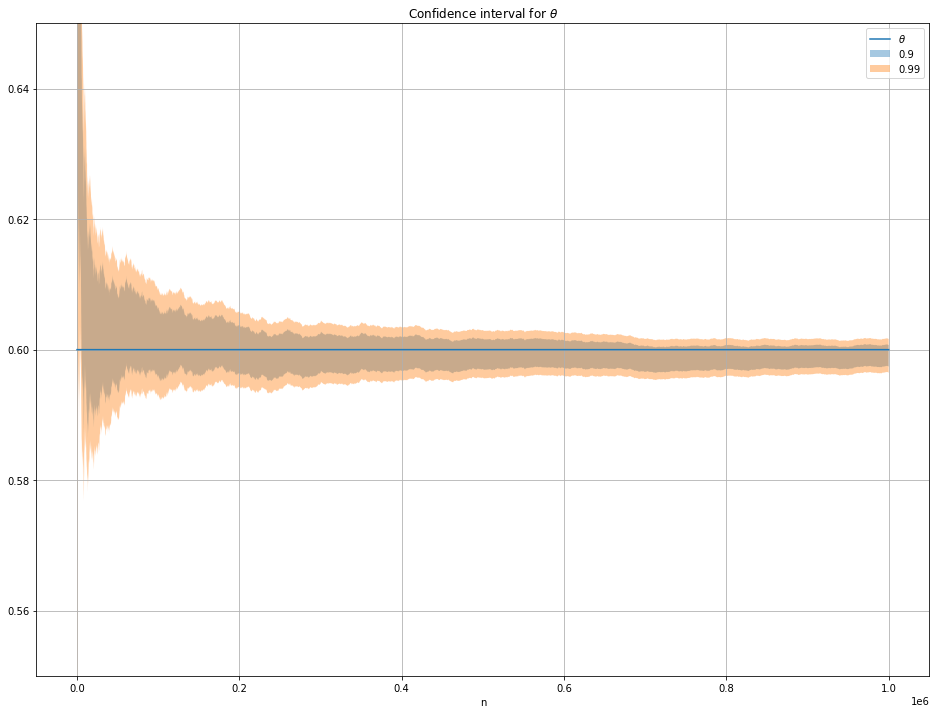

In [ ]:
N = 10**6
theta = 0.6
sample = sts.norm(theta, 1).rvs(N)

n = np.arange(N) + 1
mean = np.cumsum(sample) / n

# alpha = 0.1
z095 = sts.norm(0, 1).ppf(0.95)
z005 = sts.norm(0, 1).ppf(0.05)
# alpha = 0.01
z0995 = sts.norm(0, 1).ppf(0.995)
z0005 = sts.norm(0, 1).ppf(0.005)

# alpha = 0.1
lower09 = mean - z095 / np.sqrt(n)
upper09 = mean - z005 / np.sqrt(n)
# alpha = 0.01
lower099 = mean - z0995 / np.sqrt(n)
upper099 = mean - z0005 / np.sqrt(n)

plt.figure(figsize=(16, 12))
plt.title(r'Confidence interval for $\theta$')
plt.ylim((0.55, 0.65))
plt.xlabel('n')
plt.grid()
plt.fill_between(n, lower09, upper09, alpha=0.4, label='0.9')
plt.fill_between(n, lower099, upper099, alpha=0.4, label='0.99')
plt.plot(n, [theta] * len(n), label=r'$\theta$')
plt.legend()

##### Практическая часть

1. Пусть $\mathbf X^n \sim \mathcal N(0, \theta^2)$ - выборка. Найти точный доверительный интервал $(L, U)$ для параметра $\theta$ уровня доверия $0.95$. Проверить экспериментально, что вероятность попадания параметра в доверительный интервал стремится к уровню доверия при увеличении размера выборки. Для этого для каждого размера выборки $n \in [1, 10^5]$ сгенерировать $M = 1000$ выборок, построить доверительный интервал и вычислить

$\hat{\mathbb P}\left(L^n \leq \theta \leq U^n\right) = \frac{1}{M}\sum_{j=1}^M \mathbb I\left(L^n \leq \theta \leq U^n\right)$.

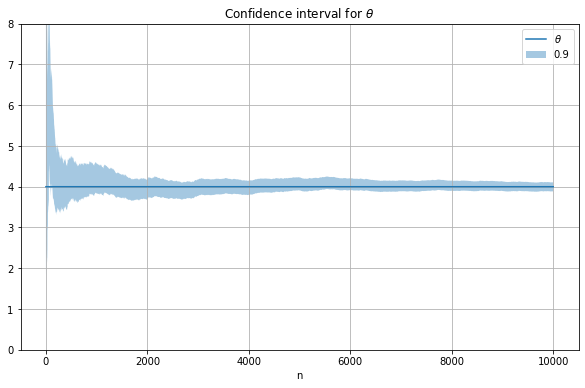

In [ ]:
theta = 2.0
M = 1000
N = 10**4

sample = sts.norm(0, theta).rvs((M, N))
n = np.arange(N) + 1
mean_square = np.cumsum(sample**2, axis=1) 

z0975 = sts.chi2.ppf(0.975, df=(n))
z0025 = sts.chi2.ppf(0.025, df=(n))

lower = mean_square / z0975
upper = mean_square / z0025

plt.figure(figsize=(10, 6))
plt.title(r'Confidence interval for $\theta$')
plt.xlabel('n')
plt.grid()
plt.fill_between(n, lower[0], upper[0], alpha=0.4, label='0.9')
plt.plot(n, [theta**2] * len(n), label=r'$\theta$')
plt.ylim((0, 8))
plt.legend()

In [ ]:
lower < theta**2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [ ]:
theta**2 < upper

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
indices_where = np.logical_and(lower < theta**2, theta**2 < upper)

In [ ]:
indices_where

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True]])

In [ ]:
prob_est = np.sum(indices_where, axis=0) / M

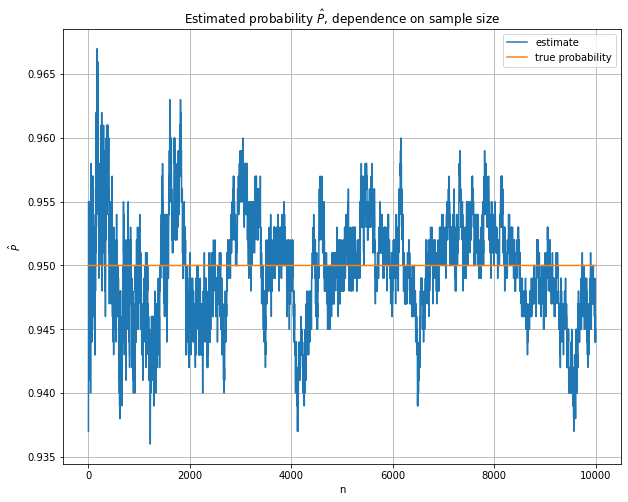

In [ ]:
plt.figure(figsize=(10,8))
plt.title(r'Estimated probability $\hat{P}$, dependence on sample size')
plt.grid()
plt.xlabel('n')
plt.ylabel(r'$\hat{P}$')
plt.plot(n, prob_est, label='estimate')
plt.plot(n, [0.95] * len(n), label='true probability')
plt.legend()

2. Пусть $\mathbf X^n$ - выборка из $U[0, \theta]$. Найти 1) точный 2) асимптотический интервалы уровня доверия $\alpha = 0.9$. Для точного интервала использовать статистику $X_{(n)}$. Сравнить графически полученные доверительные интервалы. Сравнить качество интервалов на размере выыборки $N = 10^5$, используя оценку вероятности из предыдущей задачи.

In [ ]:
N = 10**5
theta = 0.5
M = 1000
sample = sts.uniform(loc=0, scale=theta).rvs((M, N))

In [ ]:
z095 = sts.beta.ppf(0.95, N, 1)
z005 = sts.beta.ppf(0.05, N, 1)
print(z095, z005)

0.9999994870671877 0.9999700431259806


In [ ]:
lower = np.max(sample, axis=1) / z095
upper = np.max(sample, axis=1) / z005

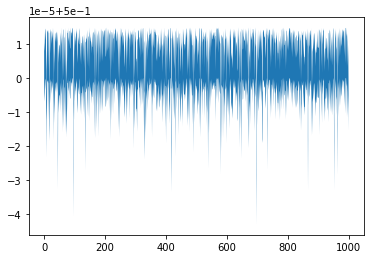

In [ ]:
plt.fill_between(np.arange(1000), lower, upper)

In [ ]:
print('probability estimate: ', np.logical_and(lower < theta, theta < upper).sum(axis=0) / M, '(true value 0.9)')

probability estimate:  0.901 (true value 0.9)


Асимптотический

In [ ]:
N = 10**3
theta = 0.5
M = 1000
sample = sts.uniform(loc=0, scale=theta).rvs((M, N))

In [ ]:
n = np.arange(N) + 1
mean = np.cumsum(sample, axis=1) / n

z095 = sts.norm.ppf(0.95)
z005 = sts.norm.ppf(0.05)

upper = mean / (z005 / np.sqrt(12 * n) + 0.5)
lower = mean / (z095 / np.sqrt(12 * n) + 0.5)

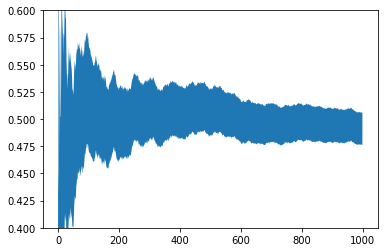

In [ ]:
upper_gr = upper[0]
lower_gr = lower[0]

plt.ylim((0.4, 0.6))
plt.fill_between(np.arange(N), lower_gr, upper_gr)

In [ ]:
print('probability estimate for asymptotic interval:', 
      np.logical_and(lower[:, 5] < theta, theta < upper[:, 5]).sum() / M)

probability estimate for asymptotic interval: 0.905


##### Разбор "плохого" доверительного интервала.

Рассмотрим модель $\mathbf X^n \sim \mathcal N(0, \theta^2)$ и доверительный интервал для параметра $\theta$

$\left(\sqrt{n}\frac{\overline{\mathbf X^n}}{z_{1 - \alpha/2}}, \sqrt{n}\frac{\overline{\mathbf X^n}}{z_{\alpha/2}}\right)$.

Так как $\frac{X_i}{\theta} \sim \mathcal N(0, 1)$, то по теореме выше 

$\frac{1}{\sqrt{n}}\frac{\sum_{i=1}^n X_i}{\theta} =  \sqrt{n}\frac{\overline{\mathbf X^n}}{\theta} \sim \mathcal N(0, 1)$.

Тогда, если $z_{\dots}$ - квантили стандартного нормального распределения, то

$\mathbb P\left(\sqrt{n}\frac{\overline{\mathbf X^n}}{z_{1 - \alpha/2}} \leq \theta \leq \sqrt{n}\frac{\overline{\mathbf X^n}}{z_{\alpha/2}}\right) = \mathbb P\left(z_{\alpha/2} \leq \sqrt{n}\frac{\overline{\mathbf X^n}}{\theta} \leq z_{1 - \alpha/2}\right) \geq 1 - \alpha$.

То есть это действительно интервал доверия для параметра $\theta$ с уровнем доверия $1 - \alpha$.

Однако, по центральной предельной теореме,

$\sqrt{n}\frac{\overline{\mathbf X^n}}{\theta} \to \xi \sim \mathcal N(0, 1), n \to \infty,$

то есть

$\sqrt{n}\frac{\overline{\mathbf X^n}}{z} \to \eta \sim \mathcal N\left(0, \frac{\theta^2}{z^2}\right), n \to \infty$.

Это означает, что данный интервал доверия симметрично расположен относительно нуля, а мы хотим в идеальном случае получать интервал доверия симметричный относительно исследуемого параметра.

##### Разбор "хорошего" доверительного интервала.

В той же модели рассмотрим другую центральную статистику. Известно, что сумма квадратов стандартных нормальных случайных величин имеет распределение $\chi^2$ с $n$ степеней свободы (chi-squared distribution). Тогда

$\sum_{i=1}^n\frac{X_i^2}{\theta^2} \sim \chi^2_{n}$.

Выбрав квантили соответствующего уровня, получаем доверительный интервал

$\left(\frac{1}{z_{1-\alpha/2}}\sum_{i=1}^nX_i^2, \frac{1}{z_{\alpha/2}}\sum_{i=1}^nX_i^2\right)$.

Он также является доверительным интервалом уровня $1 - \alpha$. Однако, обе его границы строго больше нуля, так как содержат сумму квадратов.

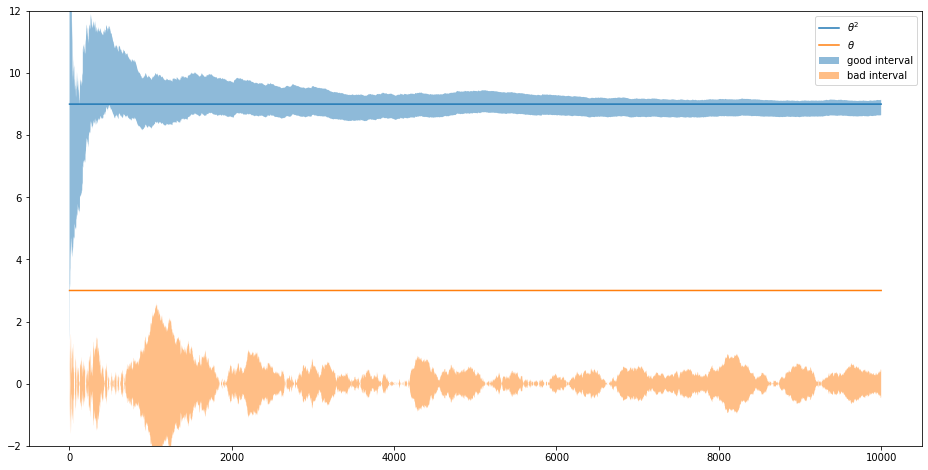

In [ ]:
theta = 3.0
N = 10**4

sample = sts.norm(0, theta).rvs(N)
n = np.arange(N) + 1

mean = np.cumsum(sample) / n

z0975_norm = sts.norm.ppf(0.975)
z0025_norm = sts.norm.ppf(0.025)

bad_lower = np.sqrt(n) * mean / z0975_norm  # squared since we estimate the \theta^2
bad_upper = np.sqrt(n) * mean / z0025_norm

z0975_chi = sts.chi2.ppf(0.975, df=n)
z0025_chi = sts.chi2.ppf(0.025, df=n)

good_lower = np.cumsum(sample**2) / z0975_chi
good_upper = np.cumsum(sample**2) / z0025_chi

plt.figure(figsize=(16,8))
plt.fill_between(n, good_lower, good_upper, alpha=0.5, label='good interval')
plt.fill_between(n, bad_lower, bad_upper, alpha=0.5, label='bad interval')
plt.plot(n, [theta**2] * len(n), label=r'$\theta^2$')
plt.plot(n, [theta] * len(n), label=r'$\theta$')
plt.ylim((-2, 12))
plt.legend()